## libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from tqdm import tqdm_notebook
import scipy.integrate as integrate
import copy
import seaborn as sns
from pathlib import Path

## initialization

In [21]:
def read_file(filename):
    df = pd.read_csv(filename, delimiter='\\s+')
    try:
        df.dropna(subset = ['phot_g_mean_mag','bp_rp'], inplace = True)
    except:
        pass
    return df

In [22]:
ISOCHRONES_DIRECTORY = Path ('../isochrones/')
PLOT_DIRECTORY = ('../plots/')

## different isochrones

In [23]:
#isochrone = read_file(ISOCHRONES_DIRECTORY / ('isochrones_z=0.0152.txt'))
isochrone = read_file(ISOCHRONES_DIRECTORY / ('isochrones_logage=7.5.txt'))

In [24]:
split_index = isochrone[isochrone['Zini'] =='Zini'].index

In [25]:
isochrones = np.split(isochrone, split_index, axis=0)

In [26]:
for i in range(len(isochrones)):
    isochrones[i] = isochrones[i].apply(pd.to_numeric, errors='coerce')
    isochrones[i].dropna(inplace = True)

In [7]:
plt.rcParams.update({'font.size': 15})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[russian]{babel}')

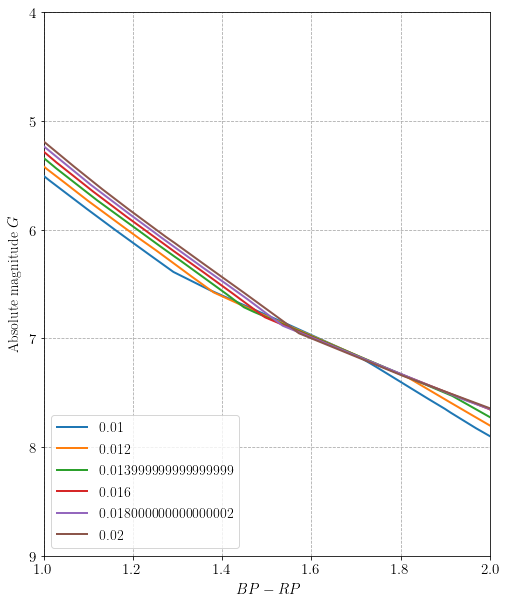

In [11]:
fig, ax = plt.subplots(figsize=(8,10))
for i in range(len(isochrones)):
    ax.plot(isochrones[i]['G_BPmag'] - isochrones[i]['G_RPmag'],
            isochrones[i]['Gmag'],
            label=isochrones[i]['Zini'].min(),
            lw=2, zorder=100)
    
ax.set_xlim(1,2)
ax.set_ylim(4,9)

ax.invert_yaxis()
ax.grid(c='#aaaaaa', ls='--')

ax.set_xlabel('$BP-RP$')
ax.set_ylabel('Absolute magnitude $G$', labelpad=8)

ax.tick_params(axis='both', which='major')

#plt.xticks(np.arange(-1, 5, 0.5))
ax.legend(loc='lower left')

#title  = CLUSTER.replace('_','\quad')
#plt.savefig(PLOT_DIRECTORY / 'different_isochrones.pdf')
plt.savefig('different_isochrones_Z.pdf')

## ZAMS

In [8]:
zams = pd.read_csv(ISOCHRONES_DIRECTORY / ('zams_pad_sm.dat'), delimiter='\\s+', header=None)

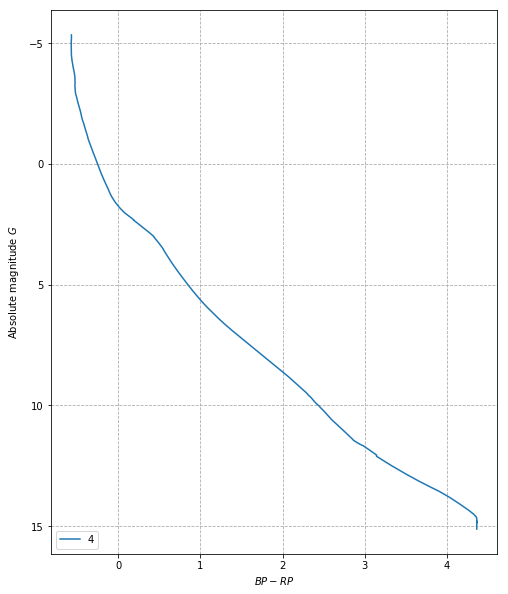

In [30]:
fig, ax = plt.subplots(figsize=(8,10))
ax.plot(zams[3],zams[4])
    


ax.invert_yaxis()
ax.grid(c='#aaaaaa', ls='--')

ax.set_xlabel('$BP-RP$')
ax.set_ylabel('Absolute magnitude $G$', labelpad=8)

ax.tick_params(axis='both', which='major')

#plt.xticks(np.arange(-1, 5, 0.5))
ax.legend(loc='lower left')

#title  = CLUSTER.replace('_','\quad')
#plt.savefig(PLOT_DIRECTORY / 'different_isochrones.pdf')
#plt.savefig('different_isochrones_Z.pdf')